In [2]:
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from RBM_helper import RBM

**This is to load MNIST as numpy array**

In [3]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]


init()
data = load()
labels = data[1]
data = data[0]
data = data/255 # normalize grey scale values between 0 and 255 to values between 0 and 1
data = np.where(data > 0.5, 1, 0)

Download complete.
Save complete.


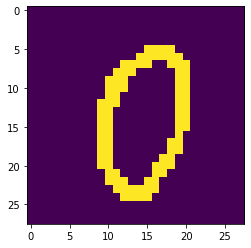

In [4]:
img = data[1000].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(img)

**This is the whole RBM training routine**

In [5]:
import torch
from RBM_helper import RBM

batch_size = 64

epochs = 1000

## Loading the images from the file
dims = data.shape
data = torch.FloatTensor(data)#.cuda()

## Starting the Machinery
vis = dims[1]   # Number of visible layers
hid = vis
k = 200
rbm = RBM(n_vis=vis, n_hin=hid).to(data) #Creation of the RBM

In [ ]:
for epoch in range(epochs):
    # loading data into the RBM
    # Faster as the epochs increase
    # Learnig rate. Faster initially, slower at the end
    lr = .1*np.exp(-epoch/epochs)+1e-4
    # Training the RBm with this parameters
    rbm.train(data, lr=lr, k=k, batch_size = batch_size)

    init_state = (torch.rand(1, vis)>0.5)*1.0
    rbm_samples = rbm.draw_samples(20, init_state)
    fe = rbm.free_energy(rbm_samples)
    likelihood = rbm.pseudo_likelihood(data, rbm_samples)
    print(fe, likelihood)
    if (epoch % 10 == 0):
        print(epoch)
        init_state = (torch.rand(1, vis)>0.5)*1.0
        rbm_samples = rbm.draw_samples(20, init_state)
        img = rbm_samples.cpu()
        img = img.detach().numpy()
        img = img.reshape(28,28)
        plt.imshow(img)
        plt.show()

**Draw sample from a given initial image**

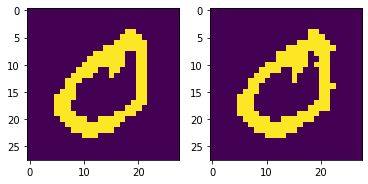

In [ ]:
initial_image = data[1]

k = 100
init_state = (torch.rand(1, vis)>0.5)*1.0
rbm_samples = rbm.draw_samples(k, initial_image)

initial_image = initial_image.cpu()
initial_image = initial_image.detach().numpy()
initial_image = initial_image.reshape(28,28)

img = rbm_samples.cpu()
img = img.detach().numpy()
img = img.reshape(28,28)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(initial_image)
axarr[1].imshow(img)

In [ ]:
rbm.save_params('/content/drive/My Drive/CDL/Cohot1')

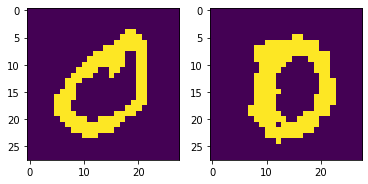

In [ ]:
rbm2 = RBM(vis, vis)
rbm2.load_params('/content/drive/My Drive/CDL/Cohot1')
img2 = rbm2.draw_samples(1000, init_state).cpu().detach().numpy().reshape(28, 28)
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(initial_image)
axarr[1].imshow(img2)